### This project is based on the kaggle dataset that provides a nutrition analysis of every menu item on the US McDonald's menu, including breakfast, beef burgers, chicken and fish sandwiches, fries, salads, soda, coffee and tea, milkshakes, and desserts.

The dataset can be used to derive so many insights but for this project I am focusing on answering the below 6 questions:
1. Nutrition analysis of every menu item, including salads, beverages, and desserts
2. Categorize items according to factors like sugar and fiber content
3. How many calories does the average McDonald's value meal contain? 
4. How much do beverages, like soda or coffee, contribute to the overall caloric intake? 
5. Does ordered grilled chicken instead of crispy increase a sandwich's nutritional value? 
6. What is the least number of items could you order from the menu to meet one day's nutritional requirements?

### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
from pulp import LpProblem, LpVariable, LpMaximize,lpSum, value, LpBinary, LpMinimize
pd.set_option('display.max_columns', None)

### Loading the dataset

In [2]:
menu = pd.read_csv('C://Users//durga//Analytics Projects//Dataset//McD_menu.csv')
menu.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10


### Exploring the dataset

In [3]:
menu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [4]:
# statistical analysis of dataset
menu.describe(include='all')

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260,260,260,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
unique,9,260,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Coffee & Tea,Egg McMuffin,16 fl oz cup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,95,1,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,20.676923,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,NaN,NaN,NaN,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,24.034954,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,4.750000,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,NaN,NaN,NaN,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,8.000000,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,NaN,NaN,NaN,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,36.250000,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000


In [5]:
menu['Category'].value_counts()

Coffee & Tea          95
Breakfast             42
Smoothies & Shakes    28
Chicken & Fish        27
Beverages             27
Beef & Pork           15
Snacks & Sides        13
Desserts               7
Salads                 6
Name: Category, dtype: int64

In [6]:
# Checking the number of items in the menu
menu['Item'].value_counts().sum()

260

## 1. Nutritional Analysis

In this section, I am going to check the nutritional value based on the amount of good and bad nutrients. The nutrients are categorized into good and bad based on the reference: https://www.fda.gov/food/new-nutrition-facts-label/how-understand-and-use-nutrition-facts-label.
Those nutrients which are advised to be included more are considered good and those nutrients which are advised to be included less are considered bad.

As such the good nutrients are: Dietary Fiber, Vitamin, Calcium, Iron. I am adding Protein to the list.

The bad nutrients are: Saturated Fat, Sodium, Sugars. I am adding Cholesterol to the list.

Based on the overall good and bad nutrient categorization, those menu items with more good nutrients and less bad nutrients will be listed and the top 10 will be considered as the best choices.

In [9]:
# Creating lists for good nutrients and bad nutrients
good_nutrients = ['Dietary Fiber (% Daily Value)', 'Protein', 'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 
                  'Calcium (% Daily Value)', 'Iron (% Daily Value)']
bad_nutrients = ['Saturated Fat (% Daily Value)', 'Cholesterol (% Daily Value)', 'Sodium (% Daily Value)', 'Sugars']

#### A new dataframe 'nutrients' is created by aggregating the values of good nutrients and bad nutrients. This gives us an idea on which items have more good nutrients and which have more bad nutrients

In [10]:
# Creating a new dataframe nutrients to hold the good and bad nutrient data
nutrients = menu[['Category','Item']]
nutrients.head()

,Category,Item
0,Breakfast,Egg McMuffin
1,Breakfast,Egg White Delight
2,Breakfast,Sausage McMuffin
3,Breakfast,Sausage McMuffin with Egg
4,Breakfast,Sausage McMuffin with Egg Whites


In [11]:
nutrients['Good Nutrients'] = menu[good_nutrients].sum(axis=1)
nutrients['Bad Nutrients'] = menu[bad_nutrients].sum(axis=1)
nutrients.head()

C:\Users\durga\AppData\Local\Temp\ipykernel_9744\1430663565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nutrients['Good Nutrients'] = menu[good_nutrients].sum(axis=1)
C:\Users\durga\AppData\Local\Temp\ipykernel_9744\1430663565.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nutrients['Bad Nutrients'] = menu[bad_nutrients].sum(axis=1)


,Category,Item,Good Nutrients,Bad Nutrients
0,Breakfast,Egg McMuffin,84,146
1,Breakfast,Egg White Delight,74,58
2,Breakfast,Sausage McMuffin,74,92
3,Breakfast,Sausage McMuffin with Egg,98,185
4,Breakfast,Sausage McMuffin with Egg Whites,79,97


#### To find the top 10 healthy Items, the data is sorted with Maximum value in Good Nutrients and Minimum value in Bad Nutrients.

In [12]:
sort_nutrients = nutrients.sort_values(by=['Good Nutrients','Bad Nutrients'], ascending=[False,True])
sort_nutrients.head(10)

,Category,Item,Good Nutrients,Bad Nutrients
89,Salads,Premium Southwest Salad with Grilled Chicken,285,74
88,Salads,Premium Southwest Salad with Crispy Chicken,281,86
135,Beverages,Minute Maid Orange Juice (Large),248,58
84,Salads,Premium Bacon Ranch Salad (without Chicken),242,44
87,Salads,Premium Southwest Salad (without Chicken),239,24
86,Salads,Premium Bacon Ranch Salad with Grilled Chicken,202,82
85,Salads,Premium Bacon Ranch Salad with Crispy Chicken,183,93
40,Breakfast,Fruit & Maple Oatmeal,176,49
75,Chicken & Fish,Premium McWrap Southwest Chicken (Grilled Chic...,176,124
41,Breakfast,Fruit & Maple Oatmeal without Brown Sugar,175,33


### It can be seen that Salads are the most healthiest of the categories as can be expected. If we need healthy options for breakfast, we can select from the above list.

## 2. Categorize based on Fiber-content

FDA recommends diet with high dietary fiber as they can increase the frequency of bowel movements, lower blood glucose and cholesterol levels, and reduce calorie intake. 

The reference shows that 5% Daily Value(DV) or less of a nutrient per serving is considered low and 20% Daily Value(DV) or more of a nutrient per serving is considered high.

I am going to categorise the Food Items based on this to : Low-fiber (<=5% DV), Medium-fiber(5-20% DV) and High-fiber(>=20% DV)

In [13]:
# function to categorize- the same function can be used to categorize other nutrients too with minute changes
def categorize_items(nutrient):
    if nutrient < 5:
        return 'Low-fiber'
    elif 5<=nutrient<20:
        return 'Medium-fiber'
    elif nutrient>=20:
        return 'High-fiber'

In [14]:
# Extracting Items along with Dietary Fiber value to categorize
fiber_source = menu[['Category','Item','Dietary Fiber','Dietary Fiber (% Daily Value)']]

# Apply categorize function
fiber_source['Fiber Content'] = fiber_source['Dietary Fiber (% Daily Value)'].apply(categorize_items)

# Display the values
fiber_source.head(10)

C:\Users\durga\AppData\Local\Temp\ipykernel_9744\4096639502.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fiber_source['Fiber Content'] = fiber_source['Dietary Fiber (% Daily Value)'].apply(categorize_items)


,Category,Item,Dietary Fiber,Dietary Fiber (% Daily Value),Fiber Content
0,Breakfast,Egg McMuffin,4,17,Medium-fiber
1,Breakfast,Egg White Delight,4,17,Medium-fiber
2,Breakfast,Sausage McMuffin,4,17,Medium-fiber
3,Breakfast,Sausage McMuffin with Egg,4,17,Medium-fiber
4,Breakfast,Sausage McMuffin with Egg Whites,4,17,Medium-fiber
5,Breakfast,Steak & Egg McMuffin,4,18,Medium-fiber
6,Breakfast,"Bacon, Egg & Cheese Biscuit (Regular Biscuit)",2,7,Medium-fiber
7,Breakfast,"Bacon, Egg & Cheese Biscuit (Large Biscuit)",3,12,Medium-fiber
8,Breakfast,"Bacon, Egg & Cheese Biscuit with Egg Whites (R...",2,7,Medium-fiber
9,Breakfast,"Bacon, Egg & Cheese Biscuit with Egg Whites (L...",3,12,Medium-fiber


In [15]:
# Displaying Items with high fiber content
fiber_source[fiber_source['Fiber Content']=='High-fiber']

,Category,Item,Dietary Fiber,Dietary Fiber (% Daily Value),Fiber Content
31,Breakfast,Big Breakfast with Hotcakes (Regular Biscuit),6,23,High-fiber
32,Breakfast,Big Breakfast with Hotcakes (Large Biscuit),7,28,High-fiber
33,Breakfast,Big Breakfast with Hotcakes and Egg Whites (Re...,6,23,High-fiber
34,Breakfast,Big Breakfast with Hotcakes and Egg Whites (La...,7,28,High-fiber
41,Breakfast,Fruit & Maple Oatmeal without Brown Sugar,5,22,High-fiber
75,Chicken & Fish,Premium McWrap Southwest Chicken (Grilled Chic...,5,20,High-fiber
82,Chicken & Fish,Chicken McNuggets (40 piece),6,24,High-fiber
87,Salads,Premium Southwest Salad (without Chicken),6,23,High-fiber
88,Salads,Premium Southwest Salad with Crispy Chicken,7,28,High-fiber
89,Salads,Premium Southwest Salad with Grilled Chicken,7,28,High-fiber


### The items listed above are good sources of Dietary fiber. Breakfast Items seems to have the high fiber content. The same categorization can be applied to any of the nutrients.

## 3. Calories of McDonald Value Meal

The average McDonald Value Meal consists of a burger, french fries and a beverage of your choice. So I am assuming value meal includes these 3 items without considering serving size.

So I am creating a category with all these 3 items which represents a meal and calculate the average calories included in a meal.

In [16]:
menu['Item'].unique()

array(['Egg McMuffin', 'Egg White Delight', 'Sausage McMuffin',
       'Sausage McMuffin with Egg', 'Sausage McMuffin with Egg Whites',
       'Steak & Egg McMuffin',
       'Bacon, Egg & Cheese Biscuit (Regular Biscuit)',
       'Bacon, Egg & Cheese Biscuit (Large Biscuit)',
       'Bacon, Egg & Cheese Biscuit with Egg Whites (Regular Biscuit)',
       'Bacon, Egg & Cheese Biscuit with Egg Whites (Large Biscuit)',
       'Sausage Biscuit (Regular Biscuit)',
       'Sausage Biscuit (Large Biscuit)',
       'Sausage Biscuit with Egg (Regular Biscuit)',
       'Sausage Biscuit with Egg (Large Biscuit)',
       'Sausage Biscuit with Egg Whites (Regular Biscuit)',
       'Sausage Biscuit with Egg Whites (Large Biscuit)',
       'Southern Style Chicken Biscuit (Regular Biscuit)',
       'Southern Style Chicken Biscuit (Large Biscuit)',
       'Steak & Egg Biscuit (Regular Biscuit)',
       'Bacon, Egg & Cheese McGriddles',
       'Bacon, Egg & Cheese McGriddles with Egg Whites',
       'Sau

In [17]:
# Adding burgers into a variable
burger = menu[menu['Item'].str.contains('burger',case=False)==True]
burger

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
48,Beef & Pork,Hamburger,3.5 oz (98 g),240,70,8.0,12,3.0,15,0.0,30,10,480,20,32,11,1,6,6,12,2,2,10,15
49,Beef & Pork,Cheeseburger,4 oz (113 g),290,100,11.0,18,5.0,27,0.5,45,15,680,28,33,11,2,7,7,15,6,2,20,15
50,Beef & Pork,Double Cheeseburger,5.7 oz (161 g),430,190,21.0,32,10.0,52,1.0,90,30,1040,43,35,12,2,8,7,24,10,2,30,20
51,Beef & Pork,Bacon Clubhouse Burger,9.5 oz (270 g),720,360,40.0,62,15.0,75,1.5,115,38,1470,61,51,17,4,14,14,39,8,25,30,25


In [18]:
# Adding fries into a variable
fries = menu[menu['Item'].str.contains('fries',case=False)==True]
fries

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
96,Snacks & Sides,Small French Fries,2.6 oz (75 g),230,100,11.0,17,1.5,8,0.0,0,0,130,5,30,10,2,10,0,2,0,30,0,4
97,Snacks & Sides,Medium French Fries,3.9 oz (111 g),340,140,16.0,24,2.5,11,0.0,0,0,190,8,44,15,4,14,0,4,0,45,2,4
98,Snacks & Sides,Large French Fries,5.9 oz (168 g),510,220,24.0,37,3.5,17,0.0,0,0,290,12,67,22,5,22,0,6,0,70,2,8
99,Snacks & Sides,Kids French Fries,1.3 oz (38 g),110,50,5.0,8,1.0,4,0.0,0,0,65,3,15,5,1,5,0,1,0,15,0,2


In [19]:
# Adding beverages into a variable
beverage = menu[menu['Category']=='Beverages']
beverage

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
110,Beverages,Coca-Cola Classic (Small),16 fl oz cup,140,0,0.0,0,0.0,0,0.0,0,0,0,0,39,13,0,0,39,0,0,0,0,0
111,Beverages,Coca-Cola Classic (Medium),21 fl oz cup,200,0,0.0,0,0.0,0,0.0,0,0,5,0,55,18,0,0,55,0,0,0,0,0
112,Beverages,Coca-Cola Classic (Large),30 fl oz cup,280,0,0.0,0,0.0,0,0.0,0,0,5,0,76,25,0,0,76,0,0,0,0,0
113,Beverages,Coca-Cola Classic (Child),12 fl oz cup,100,0,0.0,0,0.0,0,0.0,0,0,0,0,28,9,0,0,28,0,0,0,0,0
114,Beverages,Diet Coke (Small),16 fl oz cup,0,0,0.0,0,0.0,0,0.0,0,0,10,0,0,0,0,0,0,0,0,0,0,0
115,Beverages,Diet Coke (Medium),21 fl oz cup,0,0,0.0,0,0.0,0,0.0,0,0,20,1,0,0,0,0,0,0,0,0,0,0
116,Beverages,Diet Coke (Large),30 fl oz cup,0,0,0.0,0,0.0,0,0.0,0,0,35,1,0,0,0,0,0,0,0,0,0,0
117,Beverages,Diet Coke (Child),12 fl oz cup,0,0,0.0,0,0.0,0,0.0,0,0,15,1,0,0,0,0,0,0,0,0,0,0
118,Beverages,Dr Pepper (Small),16 fl oz cup,140,0,0.0,0,0.0,0,0.0,0,0,45,2,37,12,0,0,35,0,0,0,0,0
119,Beverages,Dr Pepper (Medium),21 fl oz cup,190,0,0.0,0,0.0,0,0.0,0,0,65,3,53,18,0,0,51,0,0,0,0,0


In [20]:
# Combining burger, fries and beverage in a new dataset which represents the menu for a value meal
value_meal  = pd.concat([burger, fries, beverage], ignore_index=True, sort=False)
value_meal.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Beef & Pork,Hamburger,3.5 oz (98 g),240,70,8.0,12,3.0,15,0.0,30,10,480,20,32,11,1,6,6,12,2,2,10,15
1,Beef & Pork,Cheeseburger,4 oz (113 g),290,100,11.0,18,5.0,27,0.5,45,15,680,28,33,11,2,7,7,15,6,2,20,15
2,Beef & Pork,Double Cheeseburger,5.7 oz (161 g),430,190,21.0,32,10.0,52,1.0,90,30,1040,43,35,12,2,8,7,24,10,2,30,20
3,Beef & Pork,Bacon Clubhouse Burger,9.5 oz (270 g),720,360,40.0,62,15.0,75,1.5,115,38,1470,61,51,17,4,14,14,39,8,25,30,25
4,Snacks & Sides,Small French Fries,2.6 oz (75 g),230,100,11.0,17,1.5,8,0.0,0,0,130,5,30,10,2,10,0,2,0,30,0,4


#### It is clear that all three - burger, fries and beverages are in 3 different categories - 'Beef & Pork', 'Snacks & Sides' and 'Beverages' which makes it easier to group them and calculate the average individual calorie count.

In [21]:
# Displaying the summary statistics for Calories for the 3 categories 
value_meal.groupby('Category')['Calories'].describe().reset_index()

,Category,count,mean,std,min,25%,50%,75%,max
0,Beef & Pork,4.0,420.000000,215.561283,240.0,277.5,360.0,502.5,720.0
1,Beverages,27.0,113.703704,99.194764,0.0,0.0,100.0,190.0,280.0
2,Snacks & Sides,4.0,297.500000,169.975488,110.0,200.0,285.0,382.5,510.0


#### Examining the statistical data, it becomes evident that there are no substantial deviations between the maximum and minimum calorie values within the specified categories. Thus, calculating the average calorie count for each category and subsequently summing these average values provides a reasonable approximation for the total calories in a McDonald's value meal.

In [22]:
# Calculating the average calories for each category 
avg_calories = value_meal.groupby('Category')['Calories'].mean().reset_index()
avg_calories

,Category,Calories
0,Beef & Pork,420.000000
1,Beverages,113.703704
2,Snacks & Sides,297.500000


In [23]:
# Calculating the total calories of the mean values
total_calories = avg_calories['Calories'].sum()
print(f"The average calories in a McDonald's value meal is approximately {total_calories:.2f} calories.")

The average calories in a McDonald's value meal is approximately 831.20 calories.


### The average calories in a McDonald's value meal is approx 831.20 calories which seems comparatively smaller but if you consider the maximum calories it is 1510 calories.

## 4. Contribution of Beverages to Overall Calorie Intake

This can be the contribution of beverages to the overall calorie count while taking the entire menu or it can be the contribution of beverages to the calorie count in the value meal. I am taking the calorie count of the entire menu in this context since the number of beverages is high compared to the other two categories in the value meal.

Here, I have calculated the cumulative calorie count across the 3 categories and then determined the proportion of calories contributed by 'Beverages' category within the overall context.

In [24]:
# Finding total calories of each category
cum_calories = menu.groupby('Category')['Calories'].sum().reset_index()
cum_calories

,Category,Calories
0,Beef & Pork,7410
1,Beverages,3070
2,Breakfast,22120
3,Chicken & Fish,14930
4,Coffee & Tea,26970
5,Desserts,1555
6,Salads,1620
7,Smoothies & Shakes,14880
8,Snacks & Sides,3195


In [25]:
# Calculating the calorie contribution of beverages in percentage
bev_cal = beverage['Calories'].sum()/cum_calories['Calories'].sum()*100
print(f'Contribution of beverages to overall calorie intake in a value meal is {bev_cal:.2f}%')

Contribution of beverages to overall calorie intake in a value meal is 3.21%


## 5. Grilled or crispy chicken sandwich has more nutritional value?

In the given context, we are leveraging the 'nutrients' DataFrame, previously employed in the initial part, to categorize the sandwich menu data. This classification is based on identifying the menu item with the maximum value in the "Good Nutrients" category and the minimum value in the "Bad Nutrients" category.

In [26]:
sandwich_menu = nutrients[nutrients['Item'].str.contains('sandwich',case=False)==True]
sandwich_menu.sort_values(by = ['Good Nutrients','Bad Nutrients'], ascending=[False,True])

,Category,Item,Good Nutrients,Bad Nutrients
64,Chicken & Fish,Bacon Clubhouse Grilled Chicken Sandwich,138,158
60,Chicken & Fish,Premium Grilled Chicken Club Sandwich,131,132
63,Chicken & Fish,Bacon Clubhouse Crispy Chicken Sandwich,129,170
59,Chicken & Fish,Premium Crispy Chicken Club Sandwich,128,143
62,Chicken & Fish,Premium Grilled Chicken Ranch BLT Sandwich,108,112
61,Chicken & Fish,Premium Crispy Chicken Ranch BLT Sandwich,104,124
58,Chicken & Fish,Premium Grilled Chicken Classic Sandwich,88,73
57,Chicken & Fish,Premium Crispy Chicken Classic Sandwich,82,85
65,Chicken & Fish,Southern Style Crispy Chicken Sandwich,64,74


The current presentation of nutritional values in the menu makes it challenging to discern which items have superior nutritional profiles. To enhance clarity, I am calculating an overall nutritional value for each menu item. This can be achieved by subtracting the bad nutrients from the good nutrients. Subsequently, we can sort the menu items based on their computed nutritional values.

In [27]:
# Calculating overall nutritional value and sorting the menu
sandwich_menu['Overall Nutri Value'] = sandwich_menu['Good Nutrients']-sandwich_menu['Bad Nutrients']
sandwich_menu.sort_values(by = ['Overall Nutri Value'], ascending=False)

C:\Users\durga\AppData\Local\Temp\ipykernel_9744\3957886344.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sandwich_menu['Overall Nutri Value'] = sandwich_menu['Good Nutrients']-sandwich_menu['Bad Nutrients']


,Category,Item,Good Nutrients,Bad Nutrients,Overall Nutri Value
58,Chicken & Fish,Premium Grilled Chicken Classic Sandwich,88,73,15
60,Chicken & Fish,Premium Grilled Chicken Club Sandwich,131,132,-1
57,Chicken & Fish,Premium Crispy Chicken Classic Sandwich,82,85,-3
62,Chicken & Fish,Premium Grilled Chicken Ranch BLT Sandwich,108,112,-4
65,Chicken & Fish,Southern Style Crispy Chicken Sandwich,64,74,-10
59,Chicken & Fish,Premium Crispy Chicken Club Sandwich,128,143,-15
61,Chicken & Fish,Premium Crispy Chicken Ranch BLT Sandwich,104,124,-20
64,Chicken & Fish,Bacon Clubhouse Grilled Chicken Sandwich,138,158,-20
63,Chicken & Fish,Bacon Clubhouse Crispy Chicken Sandwich,129,170,-41


### Thus, it can be seen than Grilled Chicken sandwich shows more nutritional value compared to Crispy Chicken sandwich as can be expected, since Grilled chicken is supposedly lower in fat and calories than fried chicken, making it a healthier choice for those watching their calorie intake or following a specific diet plan.

## 6. Least number of items to meet one day's nutritional requirements

The basis of this comes from the below table which shows the required nutritions for a day.
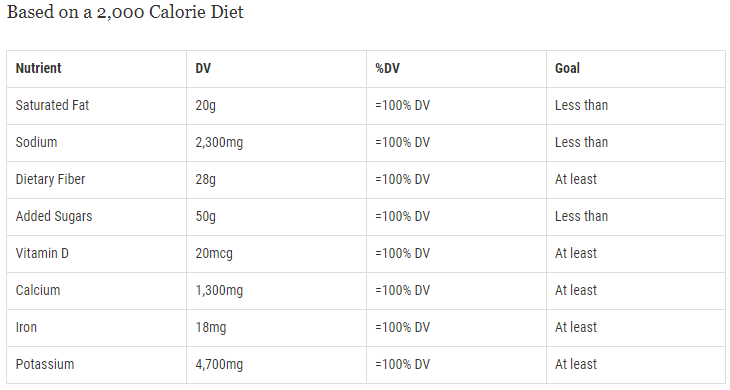

As can be seen in the table *Saturated Fat, Sodium and Sugars* should be less than 100% DV and *Dietary Fiber, Protein, Vitamin A, Vitamin C, Calcium, Iron* needs to be atleast 100% DV for a 2000 calorie diet.

This gives us an idea that the problem is similar to Knapsack problem where we have to maximize the nutritional value (ie., the good nutrients) while maintaining certain constraints(ie., not exceeding 100% DV for bad nutrients and calorie count of 2000).

I am using the optimization solver - Pulp for this.

In [28]:
# Removing Sugar and Protein from the list used in part 1 since both are not given as Daily Values
good_nutrients = ['Dietary Fiber (% Daily Value)', 'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 
                  'Calcium (% Daily Value)', 'Iron (% Daily Value)']
bad_nutrients = ['Saturated Fat (% Daily Value)', 'Cholesterol (% Daily Value)', 'Sodium (% Daily Value)']

In [84]:
# Defining good and bad nutrient threshold and the maximum calories
good_nutrient_threshold = 100 
bad_nutrient_threshold = 100
max_calories = 2000

# Defining the maximum no of items to order
max_items_to_order = 7

In [85]:
# Creating a list of item indices
items = list(range(len(menu.index))) 

# Creating a binary Linear Programming (Lp) variable for each of the menu item
item_var = LpVariable.dicts('Item', items, 0 , 1, LpBinary) 
item_var

{0: Item_0,
 1: Item_1,
 2: Item_2,
 3: Item_3,
 4: Item_4,
 5: Item_5,
 6: Item_6,
 7: Item_7,
 8: Item_8,
 9: Item_9,
 10: Item_10,
 11: Item_11,
 12: Item_12,
 13: Item_13,
 14: Item_14,
 15: Item_15,
 16: Item_16,
 17: Item_17,
 18: Item_18,
 19: Item_19,
 20: Item_20,
 21: Item_21,
 22: Item_22,
 23: Item_23,
 24: Item_24,
 25: Item_25,
 26: Item_26,
 27: Item_27,
 28: Item_28,
 29: Item_29,
 30: Item_30,
 31: Item_31,
 32: Item_32,
 33: Item_33,
 34: Item_34,
 35: Item_35,
 36: Item_36,
 37: Item_37,
 38: Item_38,
 39: Item_39,
 40: Item_40,
 41: Item_41,
 42: Item_42,
 43: Item_43,
 44: Item_44,
 45: Item_45,
 46: Item_46,
 47: Item_47,
 48: Item_48,
 49: Item_49,
 50: Item_50,
 51: Item_51,
 52: Item_52,
 53: Item_53,
 54: Item_54,
 55: Item_55,
 56: Item_56,
 57: Item_57,
 58: Item_58,
 59: Item_59,
 60: Item_60,
 61: Item_61,
 62: Item_62,
 63: Item_63,
 64: Item_64,
 65: Item_65,
 66: Item_66,
 67: Item_67,
 68: Item_68,
 69: Item_69,
 70: Item_70,
 71: Item_71,
 72: Item_72

In [86]:
# Creating a LP problem to maximize the nutritional value while staying within constraints
problem = LpProblem('MenuSelection', LpMaximize)
problem

MenuSelection:
MAXIMIZE
None
VARIABLES

In [87]:
# Defining the objective function (maximize the sum of good nutrients)
problem+=lpSum(menu.loc[i, nutrient] * item_var[i] for i in items for nutrient in good_nutrients), 'Total_Good_Nutrients'

In [88]:
# Adding constraints for bad nutrients (should not exceed threshold)
for nutrient in bad_nutrients:
    problem+=lpSum(menu.loc[i, nutrient] * item_var[i] for i in items) <= bad_nutrient_threshold,f'Max_{nutrient}'

In [89]:
# Adding a constraint on the total calories (should not exceed max_calories)
problem+=lpSum(menu.loc[i, 'Calories'] * item_var[i] for i in items) <= max_calories, 'Max_Calories'

In [90]:
# Adding constraint on the maximum number of items to select
problem+=lpSum(item_var[i] for i in items) <= max_items_to_order, 'Max_Items'

In [91]:
# Solving the optimization problem
problem.solve()

1

In [92]:
# Retrieving the selected items
selected_items = [i for i in items if item_var[i].varValue > 0] 

In [93]:
# Displaying the selected items
selected_items_df = menu.loc[selected_items, ['Category','Item','Calories']+good_nutrients+bad_nutrients]
selected_items_df

,Category,Item,Calories,Dietary Fiber (% Daily Value),Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Saturated Fat (% Daily Value),Cholesterol (% Daily Value),Sodium (% Daily Value)
40,Breakfast,Fruit & Maple Oatmeal,290,19,2,130,10,10,8,2,7
41,Breakfast,Fruit & Maple Oatmeal without Brown Sugar,260,22,2,130,6,10,8,2,5
84,Salads,Premium Bacon Ranch Salad (without Chicken),140,12,170,30,15,6,18,9,13
87,Salads,Premium Southwest Salad (without Chicken),140,23,160,25,15,10,9,3,6
88,Salads,Premium Southwest Salad with Crispy Chicken,450,28,170,30,15,15,22,17,35
89,Salads,Premium Southwest Salad with Grilled Chicken,290,28,170,30,15,15,13,23,28
135,Beverages,Minute Maid Orange Juice (Large),280,0,0,240,4,0,0,0,0


In [94]:
# Checking the total nutritional value of the selected items
selected_items_df[selected_items_df.columns[2:]].sum().reset_index(name='Total').rename(columns={'index':'Calories/Nutrients'})

,Calories/Nutrients,Total
0,Calories,1850
1,Dietary Fiber (% Daily Value),132
2,Vitamin A (% Daily Value),674
3,Vitamin C (% Daily Value),615
4,Calcium (% Daily Value),80
5,Iron (% Daily Value),66
6,Saturated Fat (% Daily Value),78
7,Cholesterol (% Daily Value),56
8,Sodium (% Daily Value),94


#### The above list can be used to select items for a 2000 calories diet to ensure maximum nutritional value. The constraints can be changed as per need. For example if the selected items should contain non-veg items like chicken or pork, another constraint can be added to the above problem to ensure that it is included.